In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from cProfile import label

In [260]:
df = pd.read_csv('daily_gold_rate.csv')


In [261]:
df.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1985-01-01,308.30,402.45,266.01,3825.85,1134.42,NaN
1,1985-01-02,305.50,401.49,266.00,3787.05,1134.42,NaN
2,1985-01-03,302.30,397.08,262.76,3718.88,1107.67,NaN
3,1985-01-04,303.15,397.15,262.58,3759.64,1118.21,NaN
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.8


In [262]:
df.isnull().sum()

Date    0
USD     0
EUR     0
GBP     0
INR     0
AED     0
CNY     4
dtype: int64

In [263]:
df.columns

Index(['Date', 'USD', 'EUR', 'GBP', 'INR', 'AED', 'CNY'], dtype='object')

In [264]:
df.shape

(9684, 7)

In [265]:
df.dropna(inplace=True)

In [266]:
df['CNY'] = df['CNY'].fillna(df['CNY'].dropna().mean())

In [267]:
df.shape

(9680, 7)

In [268]:
df['Date'] = pd.to_datetime(df['Date'])


In [269]:
df.tail()

,Date,USD,EUR,GBP,INR,AED,CNY
9679,2022-02-07,1813.55,1584.51,1340.24,135485.79,6661.26,11529.83
9680,2022-02-08,1822.60,1595.97,1344.70,136243.91,6694.50,11606.41
9681,2022-02-09,1827.80,1599.34,1349.28,136737.72,6713.60,11626.82
9682,2022-02-10,1835.35,1600.48,1347.89,137564.08,6741.33,11671.54
9683,2022-02-11,1831.15,1605.78,1346.14,138032.08,6725.91,11645.29


In [270]:
date = df['Date']
usd = df['USD']
eur = df['EUR']
gbp = df['GBP']
inr = df['INR']
aed = df['AED']
cny = df['CNY']

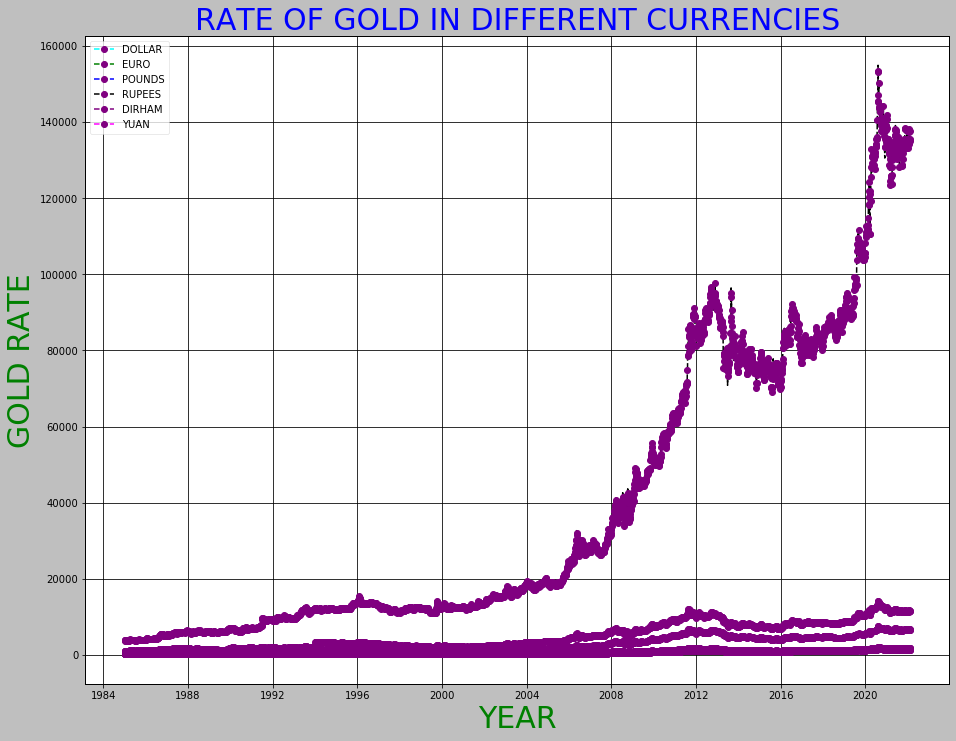

In [271]:
plt.style.use('grayscale')
fig = plt.figure(figsize=(20,15))
axes = fig.add_axes([0.1,0.1,0.6,0.6])# left, bottom, width, height
plt.plot(date,usd,color='cyan',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label = 'DOLLAR')
plt.plot(date,eur,color='green',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='EURO')
plt.plot(date,gbp,color='blue',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='POUNDS')
plt.plot(date,inr,color='black',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='RUPEES')
plt.plot(date,aed,color='purple',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='DIRHAM')
plt.plot(date,cny,color='magenta',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='YUAN')
plt.xlabel('YEAR',color='green',fontsize=30)
plt.ylabel('GOLD RATE',color='green',fontsize=30)
plt.title('RATE OF GOLD IN DIFFERENT CURRENCIES',color='blue',fontsize=30)
plt.legend() #without legend label will not pop out
plt.show()

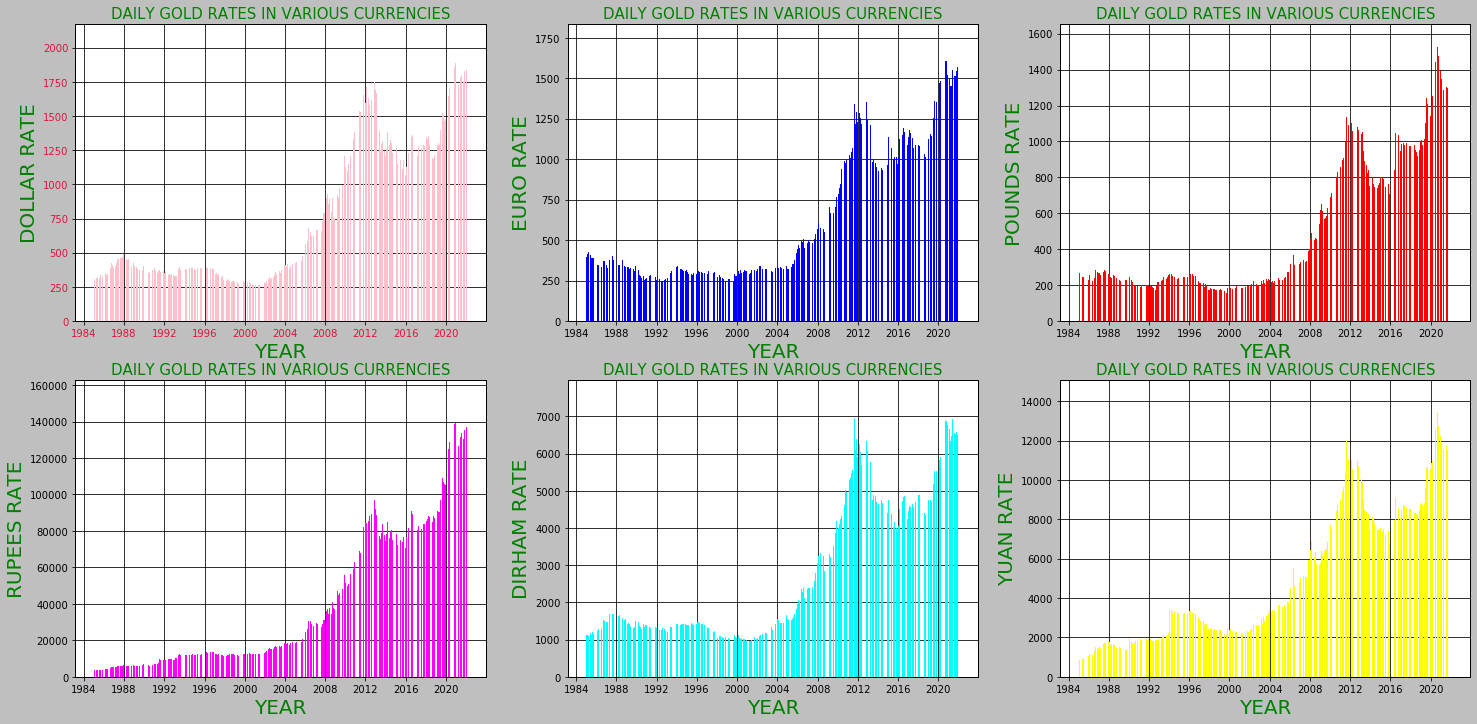

In [272]:
fig,axes = plt.subplots(2,3, figsize=(25,12))
axes[0][0].bar(date,usd,color='pink')
axes[0][0].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][0].set_ylabel('DOLLAR RATE',color='green',fontsize=20)
axes[0][0].set_title('DAILY GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[0][1].bar(date,eur,color='blue')
axes[0][1].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][1].set_ylabel('EURO RATE',color='green',fontsize=20)
axes[0][1].set_title('DAILY GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[0][2].bar(date,gbp,color='red')
axes[0][2].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][2].set_ylabel('POUNDS RATE',color='green',fontsize=20)
axes[0][2].set_title('DAILY GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][0].bar(date,inr,color='magenta')
axes[1][0].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][0].set_ylabel('RUPEES RATE',color='green',fontsize=20)
axes[1][0].set_title('DAILY GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][1].bar(date,aed,color='cyan')
axes[1][1].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][1].set_ylabel('DIRHAM RATE',color='green',fontsize=20)
axes[1][1].set_title('DAILY GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][2].bar(date,cny,color='yellow')
axes[1][2].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][2].set_ylabel('YUAN RATE',color='green',fontsize=20)
axes[1][2].set_title('DAILY GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

for label in axes[0][0].get_xticklabels():
    label.set_color('crimson')
for label in axes[0][0].get_yticklabels():
    label.set_color('crimson')

In [273]:
df2 = pd.read_csv('annual_gold_rate.csv')
df2.head()

,Date,USD,EUR,GBP,INR,AED,CNY
0,1978,193.44,124.73580,100.65449,NaN,NaN,NaN
1,1979,304.68,185.06142,143.09014,2481.90512,1163.93597,NaN
2,1980,614.50,378.19461,263.80259,4831.74943,2278.36795,NaN
3,1981,459.26,360.90588,227.01948,3966.64790,1691.03194,NaN
4,1982,375.30,345.59742,215.53232,3553.62680,1378.72895,NaN


In [274]:
df2.isnull().sum()

Date    0
USD     0
EUR     0
GBP     0
INR     1
AED     1
CNY     7
dtype: int64

In [275]:
df2.shape

(44, 7)

In [276]:
df2.dropna(inplace=True)

In [277]:
df2['INR'] = df2['INR'].fillna(df2['INR'].dropna().mean())
df2['AED'] = df2['AED'].fillna(df2['AED'].dropna().mean())
df2['CNY'] = df2['CNY'].fillna(df2['CNY'].dropna().mean())

In [278]:
df2.shape

(37, 7)

In [279]:
df2.tail()

,Date,USD,EUR,GBP,INR,AED,CNY
39,2017,1257.15,1114.05904,976.05851,81863.6221,4617.44363,8494.75064
40,2018,1268.49,1073.69770,949.60552,86658.2820,4659.26967,8379.74188
41,2019,1392.60,1244.87505,1092.92560,98108.1830,5115.16917,9634.22447
42,2020,1769.59,1549.04471,1378.98099,131199.9554,6499.95290,12205.48197
43,2021,1798.61,1520.62257,1307.53174,132967.8751,6606.55046,11600.56405


In [280]:
date = df2['Date']
usd = df2['USD']
eur = df2['EUR']
gbp = df2['GBP']
inr = df2['INR']
aed = df2['AED']
cny = df2['CNY']

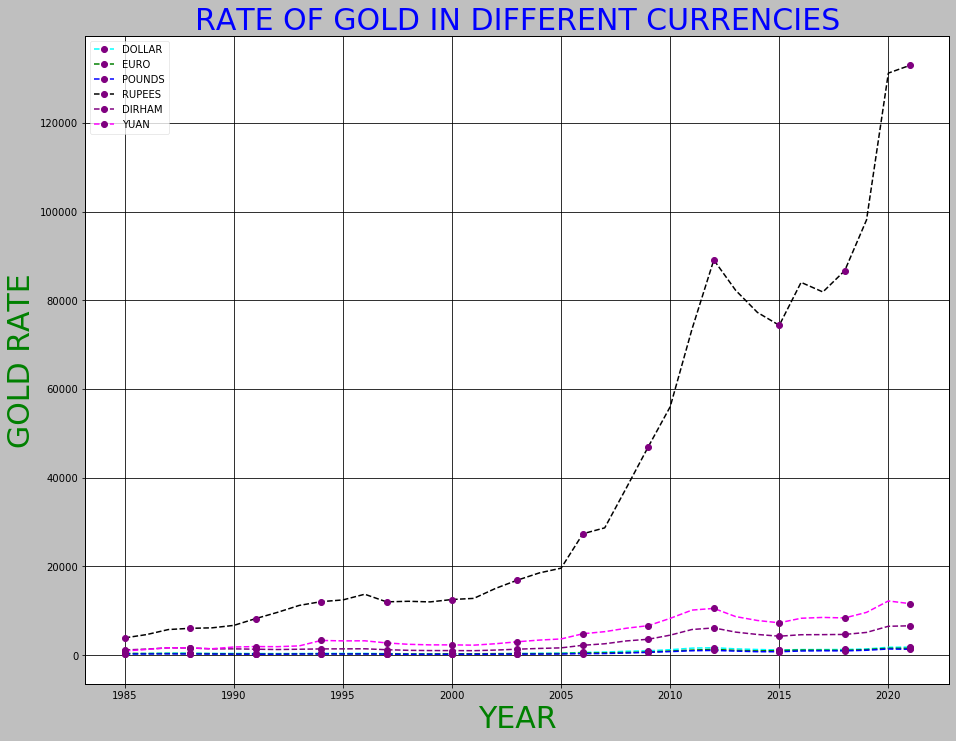

In [281]:
plt.style.use('grayscale')
fig = plt.figure(figsize=(20,15))
axes = fig.add_axes([0.1,0.1,0.6,0.6])# left, bottom, width, height
plt.plot(date,usd,color='cyan',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label = 'DOLLAR')
plt.plot(date,eur,color='green',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='EURO')
plt.plot(date,gbp,color='blue',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='POUNDS')
plt.plot(date,inr,color='black',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='RUPEES')
plt.plot(date,aed,color='purple',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='DIRHAM')
plt.plot(date,cny,color='magenta',lw=1.5,ls='--',marker='o',mec='purple',mfc='purple',markevery=3,label='YUAN')
plt.xlabel('YEAR',color='green',fontsize=30)
plt.ylabel('GOLD RATE',color='green',fontsize=30)
plt.title('RATE OF GOLD IN DIFFERENT CURRENCIES',color='blue',fontsize=30)
plt.legend() #without legend label will not pop out
plt.show()

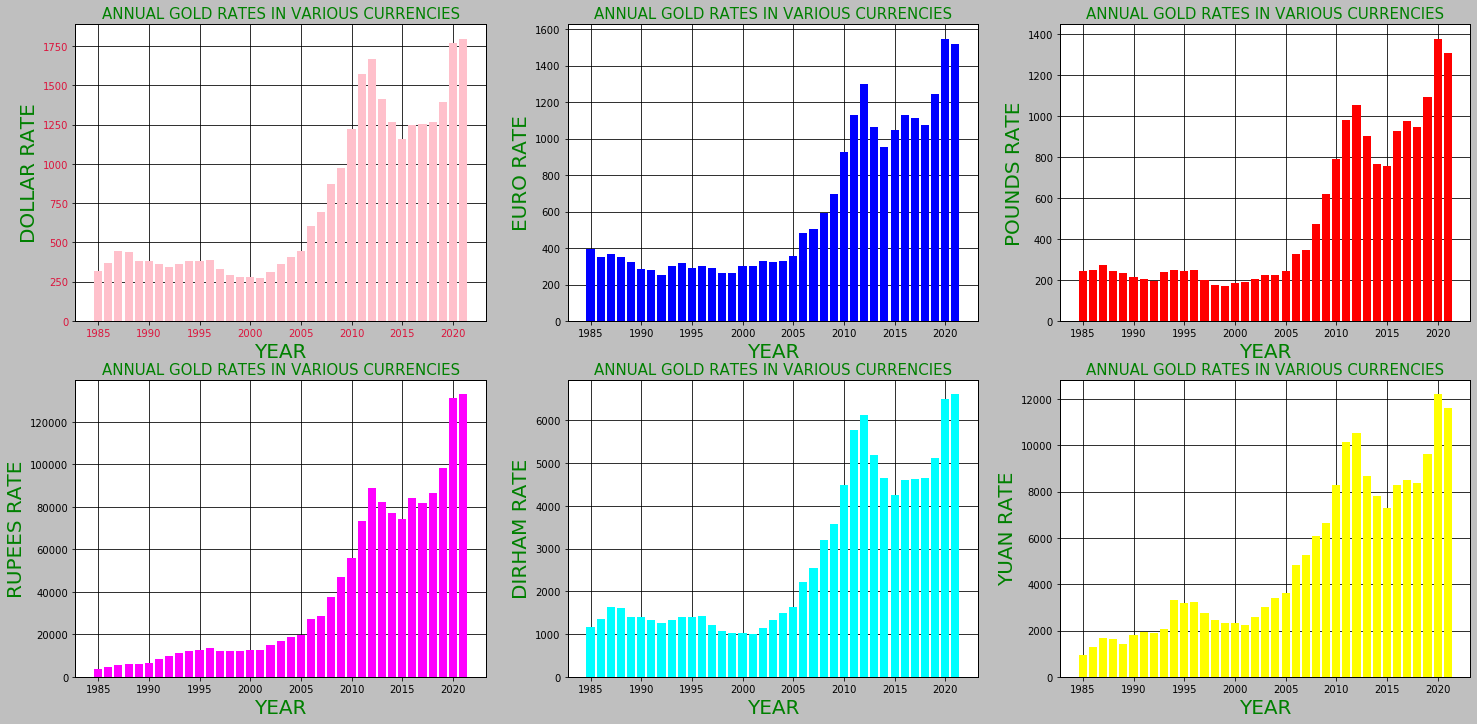

In [282]:
fig,axes = plt.subplots(2,3, figsize=(25,12))
axes[0][0].bar(date,usd,color='pink')
axes[0][0].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][0].set_ylabel('DOLLAR RATE',color='green',fontsize=20)
axes[0][0].set_title('ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[0][1].bar(date,eur,color='blue')
axes[0][1].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][1].set_ylabel('EURO RATE',color='green',fontsize=20)
axes[0][1].set_title('ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[0][2].bar(date,gbp,color='red')
axes[0][2].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][2].set_ylabel('POUNDS RATE',color='green',fontsize=20)
axes[0][2].set_title('ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][0].bar(date,inr,color='magenta')
axes[1][0].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][0].set_ylabel('RUPEES RATE',color='green',fontsize=20)
axes[1][0].set_title('ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][1].bar(date,aed,color='cyan')
axes[1][1].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][1].set_ylabel('DIRHAM RATE',color='green',fontsize=20)
axes[1][1].set_title('ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][2].bar(date,cny,color='yellow')
axes[1][2].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][2].set_ylabel('YUAN RATE',color='green',fontsize=20)
axes[1][2].set_title('ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

for label in axes[0][0].get_xticklabels():
    label.set_color('crimson')
for label in axes[0][0].get_yticklabels():
    label.set_color('crimson')

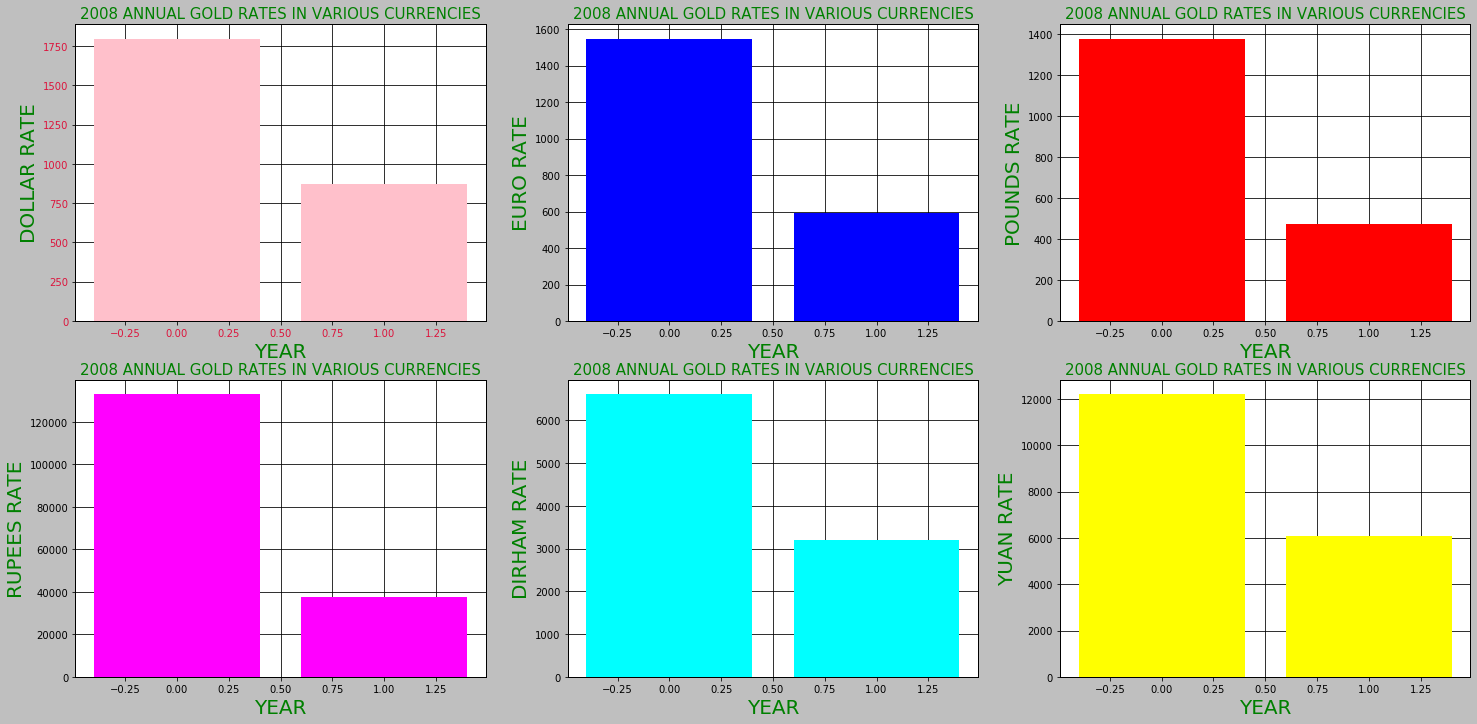

In [283]:
fig,axes = plt.subplots(2,3, figsize=(25,12))
axes[0][0].bar(date==2008,usd,color='pink')
axes[0][0].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][0].set_ylabel('DOLLAR RATE',color='green',fontsize=20)
axes[0][0].set_title('2008 ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[0][1].bar(date==2008,eur,color='blue')
axes[0][1].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][1].set_ylabel('EURO RATE',color='green',fontsize=20)
axes[0][1].set_title('2008 ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[0][2].bar(date==2008,gbp,color='red')
axes[0][2].set_xlabel('YEAR',color='green',fontsize=20)
axes[0][2].set_ylabel('POUNDS RATE',color='green',fontsize=20)
axes[0][2].set_title('2008 ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][0].bar(date==2008,inr,color='magenta')
axes[1][0].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][0].set_ylabel('RUPEES RATE',color='green',fontsize=20)
axes[1][0].set_title('2008 ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][1].bar(date==2008,aed,color='cyan')
axes[1][1].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][1].set_ylabel('DIRHAM RATE',color='green',fontsize=20)
axes[1][1].set_title('2008 ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

axes[1][2].bar(date==2008,cny,color='yellow')
axes[1][2].set_xlabel('YEAR',color='green',fontsize=20)
axes[1][2].set_ylabel('YUAN RATE',color='green',fontsize=20)
axes[1][2].set_title('2008 ANNUAL GOLD RATES IN VARIOUS CURRENCIES',color='green',fontsize=15)

for label in axes[0][0].get_xticklabels():
    label.set_color('crimson')
for label in axes[0][0].get_yticklabels():
    label.set_color('crimson')

In [288]:
df[(df['Date'] >= pd.Timestamp(2014,1,1))&(df['Date'] <= pd.Timestamp(2021,1,1))]
df

,Date,USD,EUR,GBP,INR,AED,CNY
4,1985-01-07,298.25,392.55,261.17,3741.23,1091.58,835.80
5,1985-01-08,302.00,395.32,263.07,3820.70,1114.06,853.01
6,1985-01-09,300.50,393.54,263.14,3742.23,1097.47,840.31
7,1985-01-10,303.80,397.63,268.02,3853.39,1126.83,862.79
8,1985-01-11,304.25,398.60,270.57,3845.57,1135.85,869.69
...,...,...,...,...,...,...,...
9679,2022-02-07,1813.55,1584.51,1340.24,135485.79,6661.26,11529.83
9680,2022-02-08,1822.60,1595.97,1344.70,136243.91,6694.50,11606.41
9681,2022-02-09,1827.80,1599.34,1349.28,136737.72,6713.60,11626.82
9682,2022-02-10,1835.35,1600.48,1347.89,137564.08,6741.33,11671.54
